In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

data_dir = "/Users/eduardofierro/Google Drive/TercerSemetre/Optimization/Project/Data/"
graph_dir = "/Users/eduardofierro/Google Drive/TercerSemetre/Optimization/Project/Graphs/"

# Baseline Analisis

---

- Eduardo Fierro Farah
- Raúl Delgado Sánchez

---

### Sparse Matrix

In [2]:
def load_baseline(datadir, vocab, mattype): 
    
    if mattype=="sparse":
        results = pickle.load( open(datadir +  "Results/SVM_HyperParam_ChenEtAl_{}".format(vocab), "rb" ) )
        results = [(x[0],x[2]) for x in results if x[1] == "Baseline"]
    
    elif mattype=="dense":
        results = pickle.load( open(datadir +  "Results/RunSVM_vocab.{}_denoise.None_file_type.gloves".format(vocab), "rb" ) )
        
    else: 
        raise ValueError("mattype not recognized. Select 'dense' or 'sparse'")
    
    return results

def load_baseline_all_vocab(datadir, tested_v, mattype): 
    
    results = []
    for i in tested_v:
        vocab_results = load_baseline(datadir, i, mattype)
        results.append(vocab_results)
        
    return results

def get_byTema(results, tested_vocab, topic_esp): 
    
    results_of_topic = []
    for i, x in enumerate(results):
        for y in x: 
            if y[0] == topic_esp:
                results_of_topic.append((tested_vocab[i],y[1]))
                
    return results_of_topic

def getValues(_list): 
    
    '''Receives list from get_byTema'''
    
    values = [x[1] for x in _list]
    
    return values

In [3]:
tested_vocab = [50,100,500,1000,5000,10000]
baseline_results = load_baseline_all_vocab(data_dir, tested_vocab, "sparse")
temas = ["Educación", "Campo", "Sistema Financiero", "Electoral", "Derechos Humanos", "Medio Ambiente", "Laboral"]
topics = ["Education", "Farming and Agriculture", "Financial Systems", "Elections", "Human Rights", "Enviroment", "Labor"]

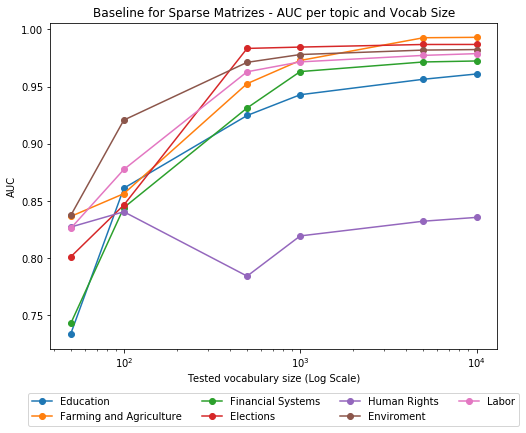

In [4]:
plt.figure(figsize=(8,6))
for x in range(0, len(temas)):
    plt.plot(tested_vocab, getValues(get_byTema(baseline_results, tested_vocab, temas[x])), '-o', label =topics[x])
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.12), ncol=4)
plt.xlabel("Tested vocabulary size (Log Scale)")
plt.ylabel("AUC")
plt.title("Baseline for Sparse Matrizes - AUC per topic and Vocab Size")
plt.xscale('log')
plt.savefig(graph_dir + "BaselineSparse" + '.pdf',bbox_inches='tight')

### GloVes

In [5]:
baseline_results = load_baseline_all_vocab(data_dir, tested_vocab, "dense")

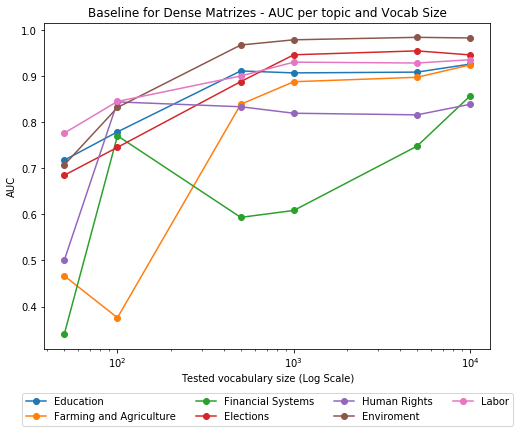

In [6]:
plt.figure(figsize=(8,6))
for x in range(0, len(temas)):
    plt.plot(tested_vocab, getValues(get_byTema(baseline_results, tested_vocab, temas[x])), '-o', label =topics[x])
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.12), ncol=4)
plt.xlabel("Tested vocabulary size (Log Scale)")
plt.ylabel("AUC")
plt.title("Baseline for Dense Matrizes - AUC per topic and Vocab Size")
plt.xscale('log')
plt.savefig(graph_dir + "BaselineGloVe" + '.pdf',bbox_inches='tight')

### All together (To get a combined plot)

In [7]:
baseline_results_sparse = load_baseline_all_vocab(data_dir, tested_vocab, "sparse")
baseline_results_dense = load_baseline_all_vocab(data_dir, tested_vocab, "dense")

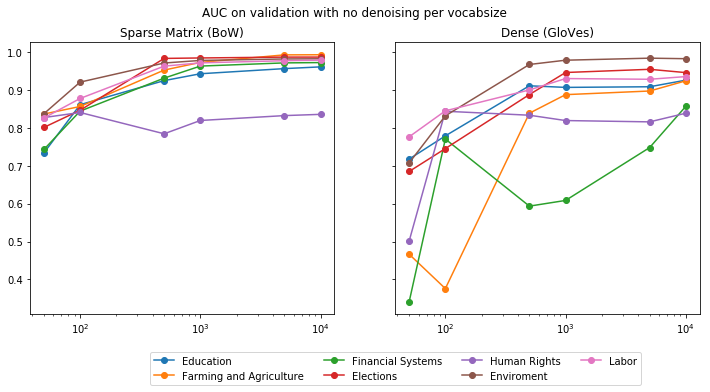

In [8]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12,5))
for x in range(0, len(temas)):
    ax1.plot(tested_vocab, getValues(get_byTema(baseline_results_sparse, tested_vocab, temas[x])), '-o', label =topics[x])
    ax2.plot(tested_vocab, getValues(get_byTema(baseline_results_dense, tested_vocab, temas[x])), '-o', label =topics[x])
ax1.set_title('Sparse Matrix (BoW)')
ax2.set_title('Dense (GloVes)')
plt.xscale('log')
plt.legend(loc=9, bbox_to_anchor=(0, -0.12), ncol=4)
plt.suptitle("AUC on validation with no denoising per vocabsize")
plt.savefig(graph_dir + "BaselineBoth" + '.pdf',bbox_inches='tight')